In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
0,Super built-up Area,19-Dec,Electronic City Phase II,coomee,1056.0,2,1,39.07,2,0
1,Plot Area,Ready To Move,Chikka Tirupathi,theanmp,2600.0,5,3,120.00,4,1
2,Built-up Area,Ready To Move,Uttarahalli,independent,1440.0,2,3,62.00,3,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,soiewre,1521.0,3,1,95.00,3,0
4,Super built-up Area,Ready To Move,Kothanur,independent,1200.0,2,1,51.00,2,0


In [4]:
df.shape

(12506, 10)

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8237
Built-up  Area          2368
Plot  Area              1814
Carpet  Area              87
Name: area_type, dtype: int64

## Analysis of The modified columns

## Price

<Axes: xlabel='price', ylabel='Density'>

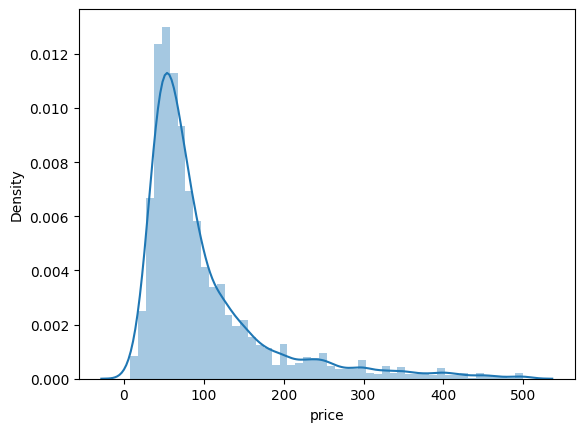

In [6]:
sns.distplot(df['price'])

In [7]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(1113,
 count    1113.000000
 mean      308.998652
 std        74.970055
 min       216.000000
 25%       250.000000
 50%       290.000000
 75%       358.000000
 max       500.000000
 Name: price, dtype: float64)

In [8]:
outliers.sort_values('price',ascending=False).head(20)

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
7012,Plot Area,Ready To Move,Whitefield,pronege,4400.0,5,2,500.0,4,1
3729,Plot Area,Ready To Move,4th Block Koramangala,independent,2400.0,4,0,500.0,4,1
11150,Plot Area,Ready To Move,Banashankari,independent,2400.0,4,3,500.0,4,1
11549,Super built-up Area,Ready To Move,1st Block Koramangala,independent,3000.0,5,3,500.0,4,0
11061,Super built-up Area,Ready To Move,Prithvi Layout,prigh l,4040.0,4,0,500.0,4,0
2073,Plot Area,Ready To Move,Ramamohanapuram,independent,2800.0,3,2,500.0,4,1
4484,Plot Area,Ready To Move,Richmond Town,independent,1800.0,5,2,500.0,4,1
11661,Plot Area,19-Dec,Bannerghatta Road,putere,4723.0,4,3,500.0,4,1
4418,Carpet Area,Ready To Move,4th Block Koramangala,independent,4500.0,9,0,500.0,9,0
6385,Plot Area,Ready To Move,1st Block HBR Layout,independent,2500.0,6,3,500.0,5,1


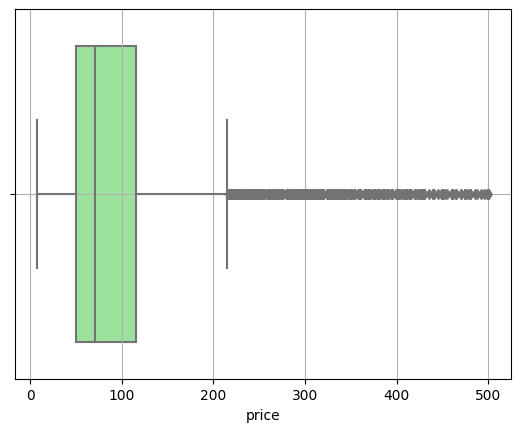

In [9]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

**There are some outliers.**
Let's not drop them preventing excess dataloss. Looking at outliers maybe it is genuine data.

## Bath

<Axes: xlabel='bath', ylabel='Density'>

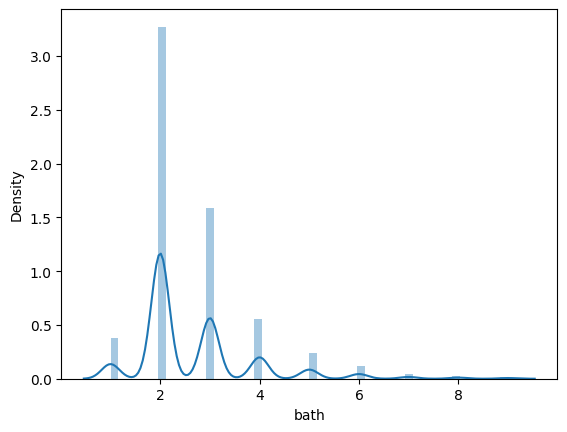

In [10]:
sns.distplot(df['bath'])

In [11]:
# Calculate the IQR for the 'bath' column
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bath'] < lower_bound) | (df['bath'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['bath'].describe()

num_outliers, outliers_price_stats

(905,
 count    905.000000
 mean       5.823204
 std        1.100941
 min        5.000000
 25%        5.000000
 50%        5.000000
 75%        6.000000
 max        9.000000
 Name: bath, dtype: float64)

In [12]:
outliers.sort_values('bath',ascending=False).head(10)

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
6319,Super built-up Area,Ready To Move,Kodigehalli,independent,1150.0,9,0,170.0,8,0
6516,Plot Area,Ready To Move,Sector 2 HSR Layout,ncdgerj,600.0,9,0,90.0,9,1
9018,Plot Area,Ready To Move,HSR Layout,independent,1200.0,9,0,350.0,9,1
2474,Plot Area,Ready To Move,Ramamurthy Nagar,independent,1500.0,9,2,250.0,7,1
7388,Plot Area,Ready To Move,Kudlu Gate,independent,1150.0,9,0,140.0,9,1
3706,Plot Area,Ready To Move,Lakkasandra,independent,4500.0,9,0,166.0,9,1
12415,Plot Area,Ready To Move,T Dasarahalli,independent,1178.0,9,1,75.0,9,1
12413,Plot Area,Ready To Move,Laggere,independent,1590.0,9,3,132.0,7,1
4220,Plot Area,Ready To Move,MS Pallya,independent,2400.0,9,3,350.0,8,1
9913,Plot Area,Ready To Move,RK Colony,independent,1200.0,9,3,230.0,9,1


In [13]:
df= df[df['bath']<=6]

**Removing rows containing bath > 6**

## Size

<Axes: >

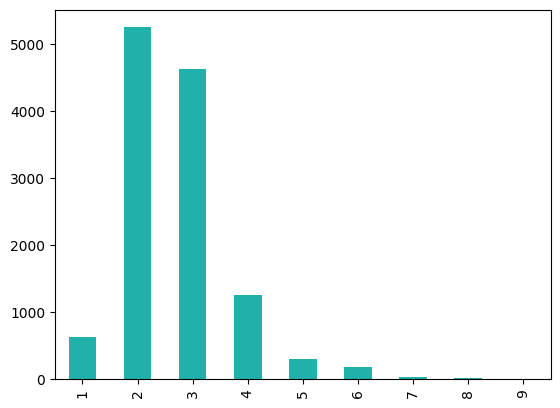

In [14]:
df['house_size'].value_counts().sort_index().plot(kind='bar',color="#20B2AA")

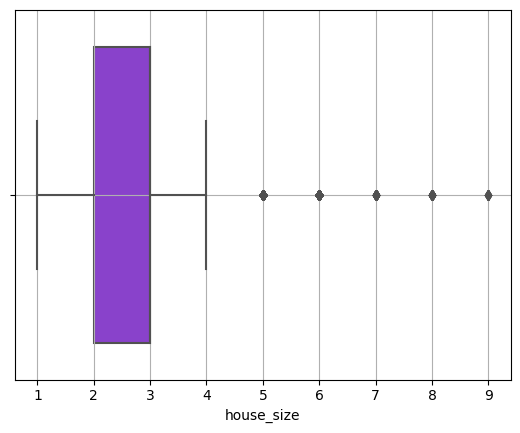

In [15]:
sns.boxplot(x=df['house_size'], color='#8A2BE2')
plt.grid()

In [16]:
df['house_size'].value_counts()

2    5252
3    4632
4    1255
1     631
5     304
6     182
7      34
8      23
9       7
Name: house_size, dtype: int64

**Remove rows containing house_size > 6**

In [17]:
df= df[df['house_size']<=6]

## total_sqft

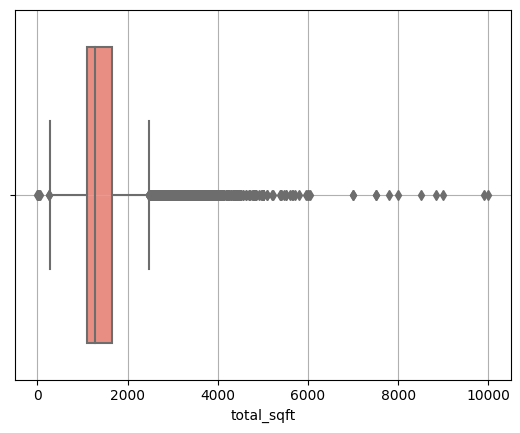

In [18]:
sns.boxplot(x=df['total_sqft'], color='salmon')
plt.grid()

In [19]:
# Calculate the IQR for the 'price' column
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['total_sqft'] < lower_bound) | (df['total_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['total_sqft'].describe()

print(lower_bound)
print(upper_bound)

num_outliers, outliers_price_stats

275.0
2475.0


(975,
 count      975.000000
 mean      3348.190308
 std        929.300959
 min          1.000000
 25%       2765.000000
 50%       3170.000000
 75%       3707.500000
 max      10000.000000
 Name: total_sqft, dtype: float64)

In [20]:
df[df['total_sqft']<=lower_bound]

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
346,Plot Area,18-Dec,Suragajakkanahalli,prhyak,11.00,3,2,74.0,3,1
997,Carpet Area,Ready To Move,Weavers Colony,independent,15.00,1,0,30.0,1,0
1092,Built-up Area,Ready To Move,Grihalakshmi Layout,independent,24.00,2,2,150.0,5,1
3939,Plot Area,Ready To Move,Sarjapur Road,independent,1.00,4,0,120.0,4,1
5731,Plot Area,Ready To Move,Mysore Road,independent,45.00,1,0,23.0,1,1
10902,Plot Area,19-Oct,Whitefield,nvaree,60.00,4,2,218.0,4,1
11533,Built-up Area,Ready To Move,Gowdanapalya,independent,258.33,5,0,75.0,5,0
12410,Super built-up Area,Ready To Move,Tilak Nagar,independent,250.00,2,2,40.0,1,0


In [21]:
df[(df['total_sqft'] >= 4000) & (df['total_sqft'] <= 4500)]

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
59,Plot Area,Ready To Move,Tharabanahalli,independent,4395.0,3,2,240.0,3,1
77,Built-up Area,Ready To Move,ISRO Layout,independent,4400.0,6,3,250.0,6,1
160,Built-up Area,Ready To Move,Whitefield,independent,4200.0,4,2,420.0,4,1
245,Plot Area,17-May,Meenakunte,sreat r,4050.0,3,2,280.0,3,1
274,Plot Area,Ready To Move,Meenakunte,sreat r,4111.0,4,2,250.0,4,1
...,...,...,...,...,...,...,...,...,...,...
11802,Super built-up Area,Ready To Move,Hebbal,brium c,4225.0,6,0,359.0,4,0
11969,Built-up Area,Ready To Move,Whitefield,independent,4144.0,5,1,331.0,5,1
12302,Super built-up Area,Ready To Move,Hebbal,brium c,4000.0,6,1,440.0,4,0
12402,Super built-up Area,Ready To Move,Hebbal,brium c,4000.0,6,1,370.0,4,0


In [22]:
df.shape

(12256, 10)

In [23]:
df=df[(df['total_sqft'] >= 200) & (df['total_sqft'] <= 4000)]

**Remove rows containing (total_sqft < 200 & total_sqft > 4000)**

In [24]:
categorical_columns = ['area_type', 'availability', 'location', 'society']
numerical_columns = ['price','bath', 'balcony','total_sqft', 'house_size','house_type']

# Bivariate analysis

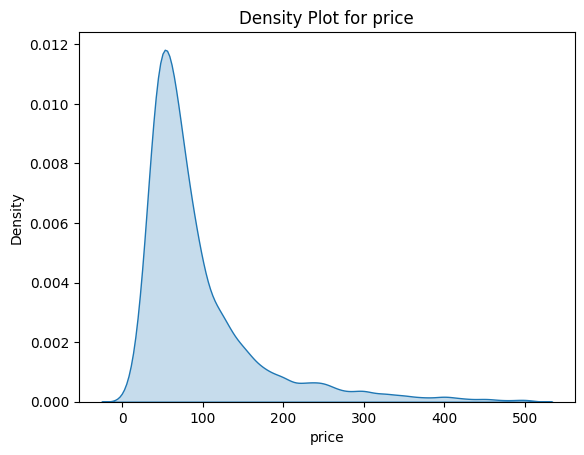

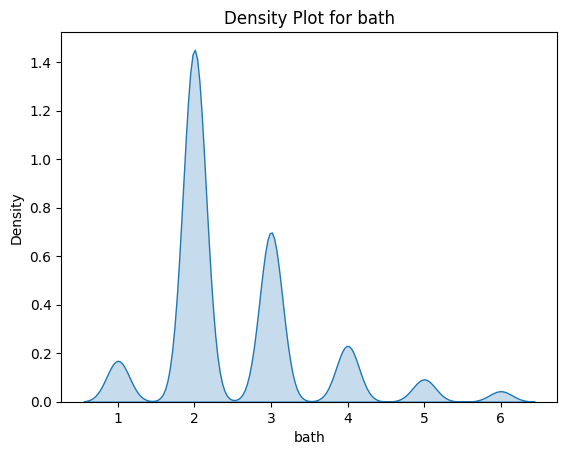

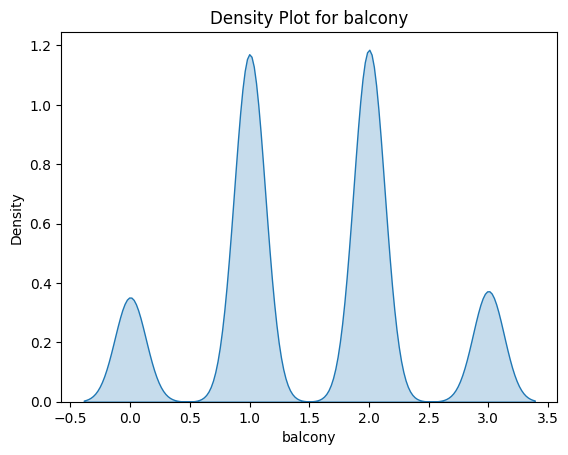

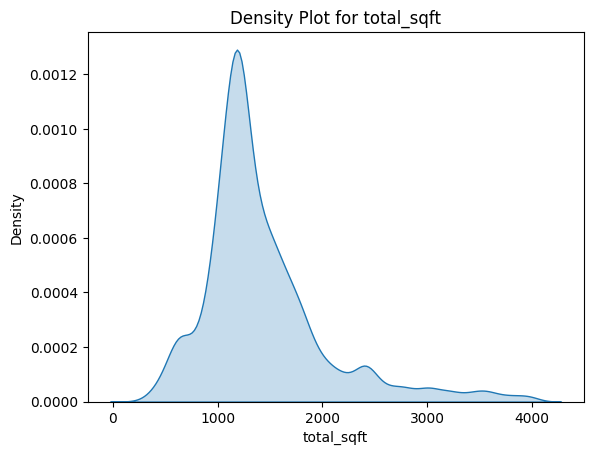

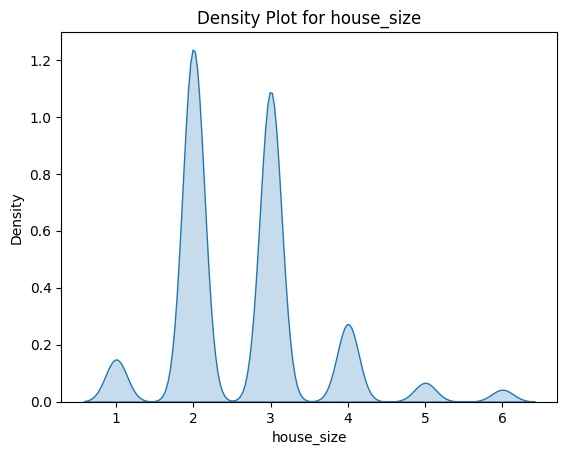

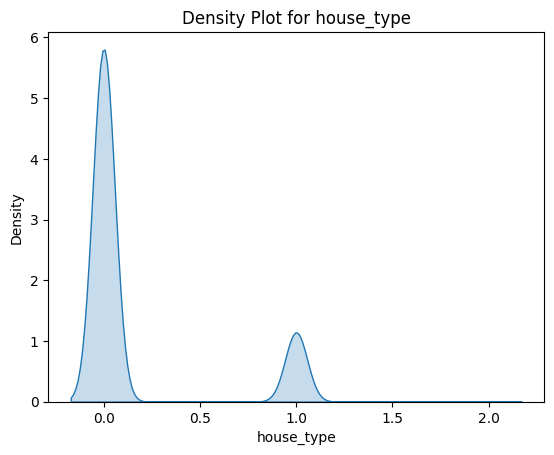

In [25]:
def create_density_plot(data, columns):
    for col in columns:
        sns.kdeplot(data[col], shade=True)
        plt.title('Density Plot for ' + col)
        plt.ticklabel_format(style='plain', axis='x')  # Set x-axis tick labels to plain notation
        plt.xlabel(col)  # Set x-axis label to the column name
        plt.ylabel('Density')  # Set y-axis label
        plt.show()
create_density_plot(df, numerical_columns)

# Multivariate Analysis

In [26]:
# Heatmap for numerical columns
def create_heatmap(data, columns):
    plt.figure(figsize=(6,4))
    sns.heatmap(data[columns].corr(), annot=True, fmt=".1f", cmap='RdYlGn')
    plt.title('Heatmap for Columns')
    plt.show()

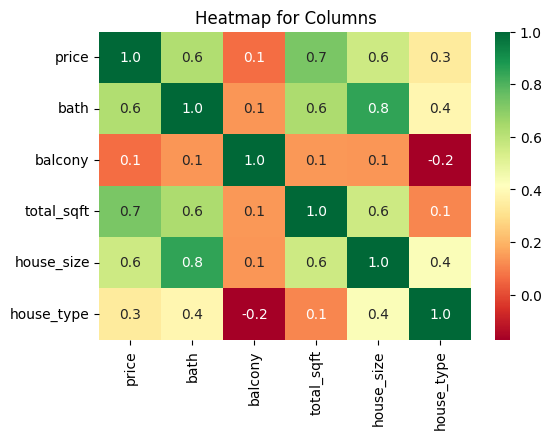

In [27]:
create_heatmap(df, numerical_columns)

In [28]:
df.to_csv('cleaned_data.csv', index=False)

In [29]:
df.shape

(12106, 10)